In [ ]:
#  installing the Kaggle library
!pip install kaggle

In [ ]:
#  configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Dog vs Cat Dataset from Kaggle

In [ ]:
#  Kaggle api
!kaggle competitions download -c dogs-vs-cats

 99% 805M/812M [00:06<00:00, 85.0MB/s]
100% 812M/812M [00:06<00:00, 129MB/s] 


In [ ]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [ ]:
# extracing the compresded dataset
from zipfile import ZipFile
dataset = '/content/dogs-vs-cats.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
# extracing the compresded dataset
from zipfile import ZipFile
dataset = '/content/train.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images',file_count)


Number of images 25000


In [ ]:
file_names = os.listdir('/content/train/')
print(file_names)

['cat.4013.jpg', 'cat.7619.jpg', 'cat.6305.jpg', 'cat.8842.jpg', 'dog.2011.jpg', 'dog.8672.jpg', 'cat.7853.jpg', 'dog.245.jpg', 'dog.2428.jpg', 'cat.1058.jpg', 'dog.6974.jpg', 'cat.3619.jpg', 'cat.1011.jpg', 'cat.12279.jpg', 'cat.3275.jpg', 'cat.5366.jpg', 'cat.11796.jpg', 'dog.10545.jpg', 'cat.4004.jpg', 'cat.2565.jpg', 'cat.8931.jpg', 'cat.11229.jpg', 'cat.12467.jpg', 'dog.10490.jpg', 'cat.8150.jpg', 'dog.9903.jpg', 'dog.1084.jpg', 'cat.8498.jpg', 'dog.673.jpg', 'cat.1315.jpg', 'dog.1895.jpg', 'dog.2703.jpg', 'dog.7488.jpg', 'cat.8104.jpg', 'dog.11765.jpg', 'cat.5426.jpg', 'dog.4007.jpg', 'dog.10678.jpg', 'dog.7078.jpg', 'cat.4195.jpg', 'cat.11128.jpg', 'cat.10153.jpg', 'cat.2556.jpg', 'cat.3634.jpg', 'cat.2314.jpg', 'cat.1450.jpg', 'dog.8306.jpg', 'dog.6980.jpg', 'cat.10776.jpg', 'dog.4753.jpg', 'dog.2305.jpg', 'cat.11996.jpg', 'dog.7540.jpg', 'cat.12073.jpg', 'cat.4036.jpg', 'cat.6381.jpg', 'cat.8404.jpg', 'cat.10862.jpg', 'cat.8244.jpg', 'cat.4853.jpg', 'cat.1172.jpg', 'dog.8417.j

importing the dependency



In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow


Displaying the image of dog and cat


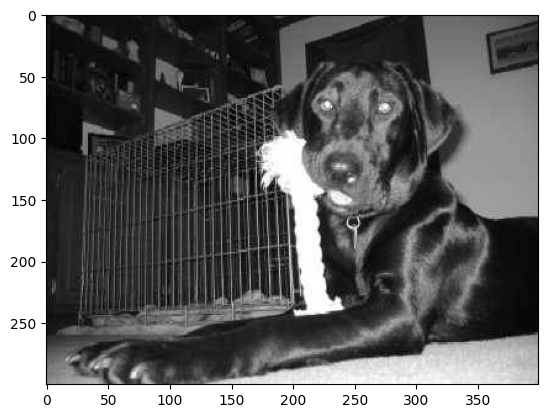

In [ ]:
# display image of dog
img = mpimg.imread('/content/train/dog.12006.jpg')
imgplot = plt.imshow(img)
plt.show()

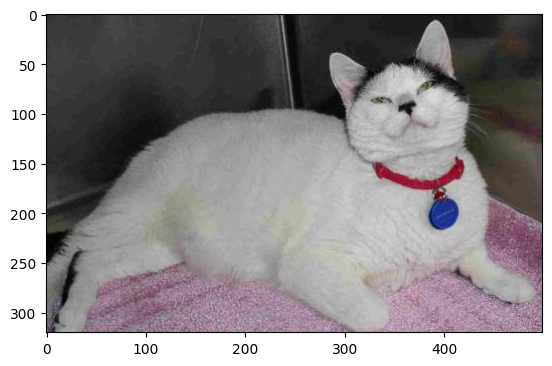

In [ ]:
# display image of cat
img = mpimg.imread('/content/train/cat.2849.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
file_names = os.listdir('/content/train/')


for i in range(5):
  name= (file_names[i])
  print(name[0:3])

cat
cat
cat
cat
dog


In [ ]:
file_names = os.listdir('/content/train/')
dog_count = 0
cat_count = 0

for img_file in file_names:
  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1
  else:
    cat_count += 1
print( 'number of dog imges =',dog_count)
print('number of cat images=',cat_count)


number of dog imges = 12500
number of cat images= 12500


In [ ]:
# creating a directory for resized image
os.mkdir('/content/image resized')

In [ ]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'
for i in range(2000):
  filename= os.listdir(original_folder)[i]
  img_path =original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224,224))
  img =img.convert('RGB')
  newImgPath = resized_folder+filename
  img.save(newImgPath)



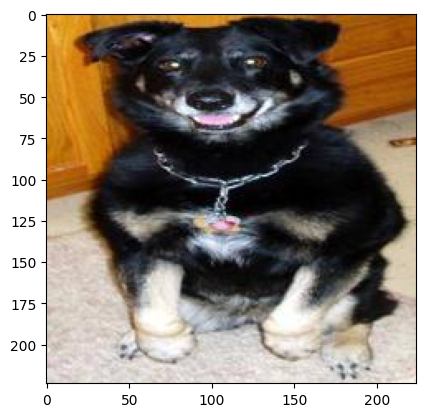

In [ ]:
# display resized dog image
img = mpimg.imread('/content/image resized/dog.2011.jpg')
imgplot = plt.imshow(img)
plt.show()

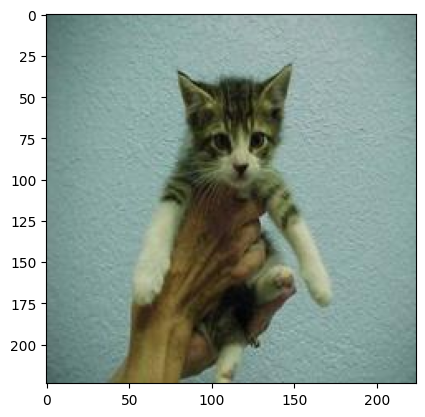

In [ ]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat.6305.jpg')
imgplot = plt.imshow(img)
plt.show()

**Creating lables for reside images for dog and cats**


cats --> 0

dog--> 1

In [ ]:
# creating a for loop to assign labels
files_names = os.listdir('/content/image resized/')
labels = []

for i in range(2000):
  file_name  = files_names[i]
  label = file_name[0:3]
  if label == 'dog':
    labels.append(1)
  else:
    labels.append(0)

In [ ]:
print(files_names[0:5])
print(len(files_names))

['cat.4013.jpg', 'cat.7619.jpg', 'cat.6305.jpg', 'cat.8842.jpg', 'dog.2011.jpg']
2000


In [ ]:
print(labels[0:5])
print(len(labels))


[0, 0, 0, 0, 1]
2000


In [ ]:
# counting the images of dogs and cats out out of 2000 images
values,counts = np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[1018  982]


**Converting all the resized images to Numpy array**

In [ ]:
import cv2
import glob

In [ ]:
image_direrctory = '/content/image resized/'
image_extensions = ['png','jpg']
files = []

[files.extend(glob.glob(image_direrctory + '*.' + e)) for e in image_extensions]
dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_images )

[[[[ 73  96  91]
   [ 80 103  98]
   [ 88 109 106]
   ...
   [125 133 132]
   [126 131 130]
   [129 134 133]]

  [[ 70  93  89]
   [ 67  90  86]
   [ 66  87  84]
   ...
   [125 133 132]
   [126 131 130]
   [129 134 133]]

  [[ 67  89  87]
   [ 66  88  86]
   [ 66  87  85]
   ...
   [125 133 132]
   [126 131 130]
   [129 134 133]]

  ...

  [[ 87 101  99]
   [ 86 100  98]
   [ 88 102 100]
   ...
   [ 92  97  95]
   [ 89  96  93]
   [ 88  95  92]]

  [[ 84  98  96]
   [ 86 100  98]
   [ 89 103 101]
   ...
   [ 91  96  94]
   [ 88  95  92]
   [ 87  94  91]]

  [[ 92 106 104]
   [ 94 108 106]
   [ 94 108 106]
   ...
   [ 91  96  94]
   [ 87  94  91]
   [ 86  93  90]]]


 [[[187 208 210]
   [188 209 211]
   [189 208 211]
   ...
   [ 67  75  74]
   [161 172 170]
   [204 215 213]]

  [[188 209 211]
   [189 210 212]
   [190 209 212]
   ...
   [ 70  78  77]
   [167 178 176]
   [203 214 212]]

  [[189 210 212]
   [189 210 212]
   [191 210 213]
   ...
   [ 75  83  82]
   [171 182 180]
   [200 211

In [ ]:
type(dog_cat_images)

numpy.ndarray

In [ ]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [ ]:
X = dog_cat_images
Y = np.asarray(labels)

**Train test Split**

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)


In [ ]:
print(X.shape,X_train.shape)
print(X_test.shape)


(2000, 224, 224, 3) (1600, 224, 224, 3)
(400, 224, 224, 3)


1600 --> traing images

400 --> test images

In [ ]:
# scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255


In [ ]:
print(X_train_scaled)

[[[[0.         0.10588235 0.32941176]
   [0.04705882 0.16470588 0.38823529]
   [0.06666667 0.18431373 0.41568627]
   ...
   [0.53333333 0.56862745 0.61960784]
   [0.52156863 0.56078431 0.62745098]
   [0.44313725 0.48235294 0.55294118]]

  [[0.         0.11372549 0.3372549 ]
   [0.03921569 0.15686275 0.38039216]
   [0.05490196 0.17254902 0.40392157]
   ...
   [0.52941176 0.57647059 0.62352941]
   [0.50196078 0.54117647 0.60784314]
   [0.40392157 0.44313725 0.51372549]]

  [[0.01568627 0.13333333 0.36470588]
   [0.02745098 0.14509804 0.37647059]
   [0.03921569 0.15294118 0.39215686]
   ...
   [0.53333333 0.57647059 0.63137255]
   [0.4745098  0.51372549 0.58431373]
   [0.34901961 0.39215686 0.47058824]]

  ...

  [[0.58431373 0.63921569 0.63529412]
   [0.58431373 0.63921569 0.63529412]
   [0.58823529 0.64313725 0.63921569]
   ...
   [0.65882353 0.71372549 0.70980392]
   [0.65882353 0.71372549 0.70980392]
   [0.65882353 0.71372549 0.70980392]]

  [[0.57647059 0.63137255 0.62745098]
   [0.5

**Building the neural network**

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tf_keras

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model = hub.KerasLayer(mobilenet_model,input_shape=(224,224,3),trainable=False)


In [ ]:
num_of_classes = 2
model = tf_keras.Sequential([
    pretrained_model,
    tf_keras.layers.Dense(num_of_classes)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
model.compile(

              optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc']
)

In [ ]:
#here epochs work is itrate or run 'n' times to give an accurate result
model.fit(X_train_scaled,Y_train,epochs=5)

Epoch 1/5
50/50 [==============================] - 64s 1s/step - loss: 0.1869 - acc: 0.9287
Epoch 2/5
50/50 [==============================] - 58s 1s/step - loss: 0.0570 - acc: 0.9837
Epoch 3/5
50/50 [==============================] - 56s 1s/step - loss: 0.0403 - acc: 0.9906
Epoch 4/5
50/50 [==============================] - 53s 1s/step - loss: 0.0320 - acc: 0.9944
Epoch 5/5
50/50 [==============================] - 54s 1s/step - loss: 0.0253 - acc: 0.9950


In [ ]:
score,acc = model.evaluate(X_test_scaled,Y_test)
print('test loss',score)
print('test accuracy',acc)

13/13 [==============================] - 14s 1s/step - loss: 0.0392 - acc: 0.9825
test loss 0.039189163595438004
test accuracy 0.9825000166893005


**Predictive system**

In [ ]:
input_imagae_path= input('Path of the image to be predicted: ')
input_image = cv2.imread(input_imagae_path)
cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image,(224,224))
input_image_scaled = input_image_resize/255
image_reshaped = np.reshape(input_image_scaled,[1,224,224,3])
input_prediction = model.predict(image_reshaped)
input_pred_label =np.argmax(input_prediction)
print(input_prediction)
print(input_pred_label)

if input_pred_label == 0:
  print('The image represent a cat')
else:
  print('The image represent a dog')